## Importing necessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

In [3]:
!conda install -c conda-forge beautifulsoup4 --yes
from bs4 import BeautifulSoup


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.0       |   py36h9f0ad1d_0         160 KB  conda-forge
    soupsieve-1.9.4            |   py36h9f0ad1d_1          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         218 KB

The following NEW packages will be INSTALLED:

  beautifulsoup4     conda-forge/linux-64::beautifulsoup4-4.9.0-py36h9f0ad1d_0
  soupsieve          conda-forge/linux-64::soupsieve-1.9.4-py36h9f0ad1d_1



soupsieve-1.9.4      | 58 KB     | ##################################### | 100% 
beautifulsoup4-4.9.0 | 160 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction

In [13]:
#!conda install -c conda-forge lxml --yes

#### Web scraping data from Wikipedia

In [14]:

from bs4 import BeautifulSoup

res = requests.get("http://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(res.content,'html5lib')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))
print(df[0].to_json(orient='records'))

[{"Postal Code":"M1A","Borough":"Not assigned","Neighborhood":null},{"Postal Code":"M2A","Borough":"Not assigned","Neighborhood":null},{"Postal Code":"M3A","Borough":"North York","Neighborhood":"Parkwoods"},{"Postal Code":"M4A","Borough":"North York","Neighborhood":"Victoria Village"},{"Postal Code":"M5A","Borough":"Downtown Toronto","Neighborhood":"Regent Park, Harbourfront"},{"Postal Code":"M6A","Borough":"North York","Neighborhood":"Lawrence Manor, Lawrence Heights"},{"Postal Code":"M7A","Borough":"Downtown Toronto","Neighborhood":"Queen's Park, Ontario Provincial Government"},{"Postal Code":"M8A","Borough":"Not assigned","Neighborhood":null},{"Postal Code":"M9A","Borough":"Etobicoke","Neighborhood":"Islington Avenue"},{"Postal Code":"M1B","Borough":"Scarborough","Neighborhood":"Malvern, Rouge"},{"Postal Code":"M2B","Borough":"Not assigned","Neighborhood":null},{"Postal Code":"M3B","Borough":"North York","Neighborhood":"Don Mills"},{"Postal Code":"M4B","Borough":"East York","Neighbo

#### Loading the scraped data into a pandas dataframe

In [15]:
data = df[0]
data.head()

Postal Code           Borough               Neighborhood
0         M1A      Not assigned                        NaN
1         M2A      Not assigned                        NaN
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

Checking in to see if there are any duplicate Postal Codes

In [16]:
print(len(data['Postal Code'].unique()), len(data))

180 180


#### Removing NA boroughs and neighborhoods

In [17]:
data = data[data['Borough'] != 'Not assigned']
data = data.sort_values(by=['Postal Code'], ascending=True).reset_index(drop=True)
data.head()

Postal Code      Borough                            Neighborhood
0         M1B  Scarborough                          Malvern, Rouge
1         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek
2         M1E  Scarborough       Guildwood, Morningside, West Hill
3         M1G  Scarborough                                  Woburn
4         M1H  Scarborough                               Cedarbrae

In [18]:
data.shape

(103, 3)

In [25]:
#!conda install -c conda-forge geocoder --yes

In [31]:
import geocoder
g = geocoder.google('Toronto, Ontario')
print(g)

<[REQUEST_DENIED] Google - Geocode [empty]>


Tried using both APIs to fetch geo data but network restrictions left me no choice but to use the data file

In [32]:
!wget -q -O 'toronto_data.csv' https://cocl.us/Geospatial_data
print('Data downloaded!')

Data downloaded!


#### Load Toronto geo data file into a pandas data frame and join it to the main dataframe

In [33]:
latlong_df = pd.read_csv('toronto_data.csv',sep=',')
latlong_df.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

Joining the latitude and longitude data to the main dataframe i.e. neighborhoods

In [35]:
neighborhoods = pd.merge(data, latlong_df, how='inner',left_on='Postal Code', right_on='Postal Code')
print(neighborhoods.shape)
neighborhoods.head()

(103, 5)


Postal Code      Borough                            Neighborhood   Latitude  \
0         M1B  Scarborough                          Malvern, Rouge  43.806686   
1         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.784535   
2         M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3         M1G  Scarborough                                  Woburn  43.770992   
4         M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [38]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


#### Create a map of Toronto

In [39]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

##### Adding image of the map to be visible when the notebook is not trusted

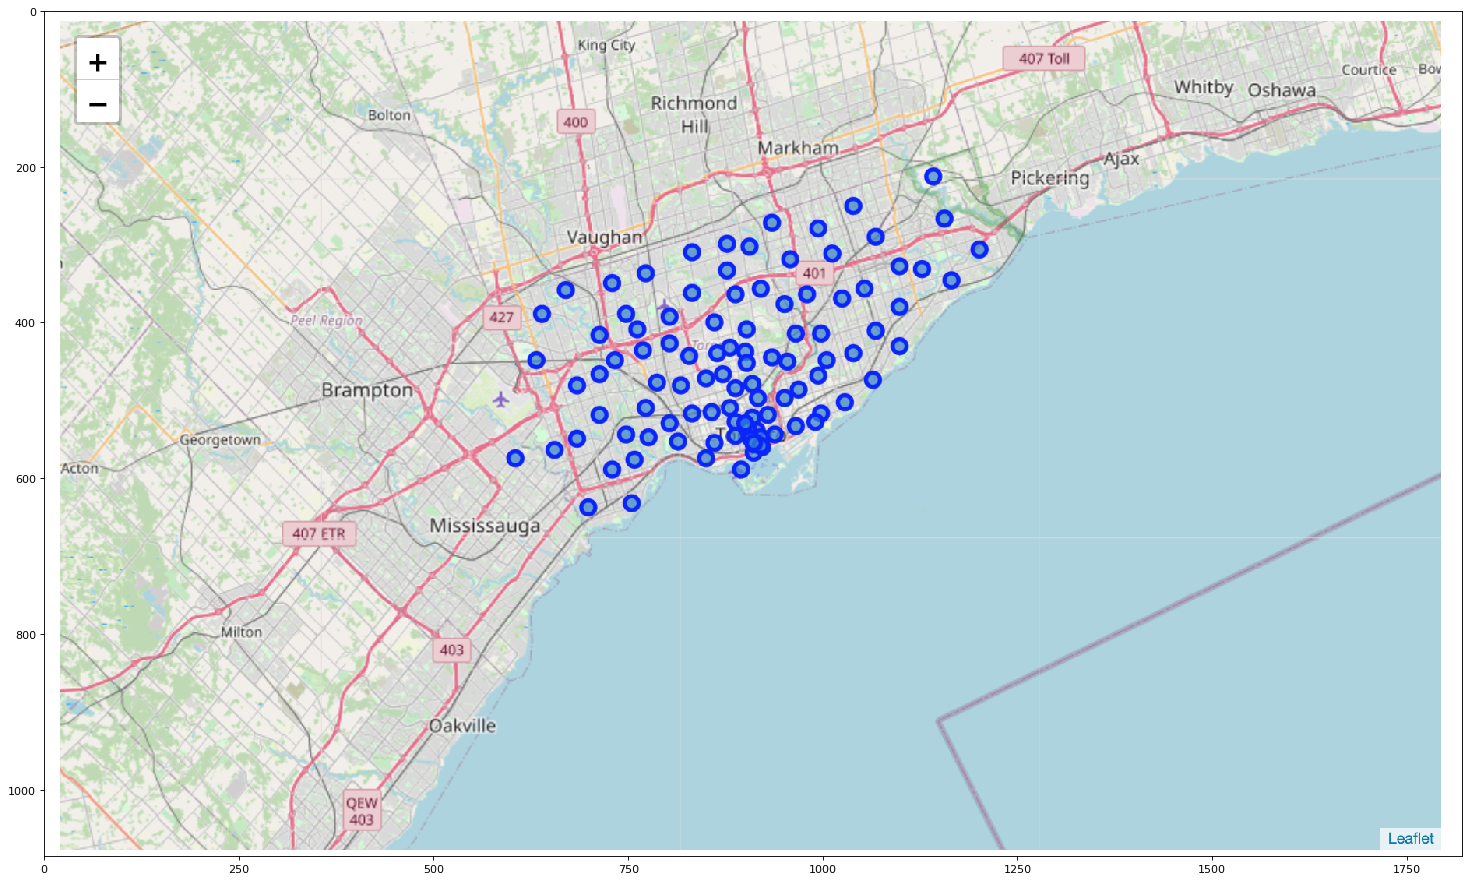

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('Segmenting & Clustering Toronto Neighborhood - img 1.png')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 14), dpi=80, sharex=True, sharey=True)
ax.imshow(img)

imgplot = plt.imshow(img)
plt.show()

#### Define Four Square Credentials

In [147]:
CLIENT_ID = 'AC314WM4YCFZCL1ZTQZJCYRHMRRZ0SZESNVDQMKXMKQF45SGG----' # your Foursquare ID
CLIENT_SECRET = 'LCSBHLFZM515QRBWF4U1QNKN4VPVZY4LNNLBW4I1YLMKB3UXG----' # your Foursquare Secret
VERSION = '20200515' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AC314WM4YCFZCL1ZTQZJCYRHMRRZ0SZESNVDQMKXMKQF45SGG----
CLIENT_SECRET:LCSBHLFZM515QRBWF4U1QNKN4VPVZY4LNNLBW4I1YLMKB3UXG----


#### Toronto Data

#### Let's explore Toronto neighborhood in our dataframe.

Get the neighborhood's name.

In [61]:
neighborhoods.head()

Postal Code      Borough                            Neighborhood   Latitude  \
0         M1B  Scarborough                          Malvern, Rouge  43.806686   
1         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.784535   
2         M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3         M1G  Scarborough                                  Woburn  43.770992   
4         M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [65]:
toronto_neighborhoods = neighborhoods[neighborhoods['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto_neighborhoods.head()

Postal Code          Borough                    Neighborhood   Latitude  \
0         M4E     East Toronto                     The Beaches  43.676357   
1         M4K     East Toronto    The Danforth West, Riverdale  43.679557   
2         M4L     East Toronto  India Bazaar, The Beaches West  43.668999   
3         M4M     East Toronto                 Studio District  43.659526   
4         M4N  Central Toronto                   Lawrence Park  43.728020   

   Longitude  
0 -79.293031  
1 -79.352188  
2 -79.315572  
3 -79.340923  
4 -79.388790

#### Lets get geographical data about Toronto

In [63]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Create Toronto Borough Map

In [66]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_neighborhoods['Latitude'], toronto_neighborhoods['Longitude'], toronto_neighborhoods['Borough'], toronto_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

##### Adding image of the above map if the notebook doesn't display map for trust issues

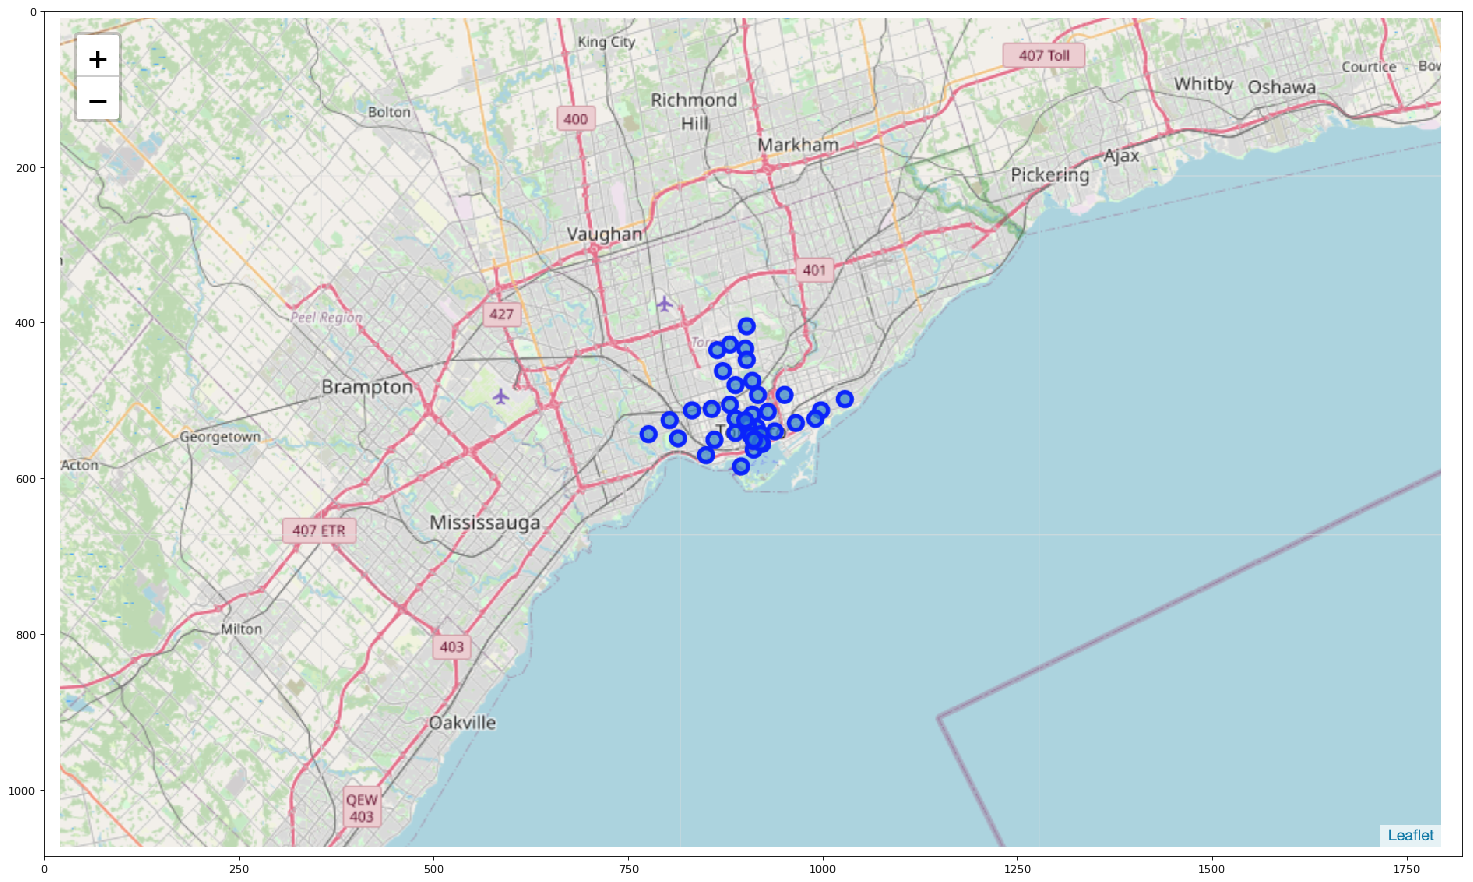

In [13]:
img=mpimg.imread('Segmenting & Clustering Toronto Neighborhood - img 2.png')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 14), dpi=80, sharex=True, sharey=True)
ax.imshow(img)

imgplot = plt.imshow(img)
plt.show()

#### Create a function to explore all neighborhoods in Toronto boroughs

In [74]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        LIMIT = 100
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

##### Get Category type function from Four Square

In [75]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Let's use this function to get all the venues for all the neighborhoods in Toronto borough

In [76]:


toronto_venues = getNearbyVenues(names=toronto_neighborhoods['Neighborhood'],
                                   latitudes=toronto_neighborhoods['Latitude'],
                                   longitudes=toronto_neighborhoods['Longitude']
                                  )



The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High Park, The Junction South
Parkdale, Ron

#### Let's check the size of the resulting dataframe

In [78]:
print(toronto_venues.shape)
toronto_venues.head()

(1606, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  The Beaches              43.676357              -79.293031   
1  The Beaches              43.676357              -79.293031   
2  The Beaches              43.676357              -79.293031   
3  The Beaches              43.676357              -79.293031   
4  The Beaches              43.676357              -79.293031   

                                Venue  Venue Latitude  Venue Longitude  \
0                   Glen Manor Ravine       43.676821       -79.293942   
1  The Big Carrot Natural Food Market       43.678879       -79.297734   
2                 Grover Pub and Grub       43.679181       -79.297215   
3                       Upper Beaches       43.680563       -79.292869   
4                 Seaspray Restaurant       43.678888       -79.298167   

      Venue Category  
0              Trail  
1  Health Food Store  
2                Pub  
3       Neighborhood  
4   Asian Restaurant

Let's check how many venues were returned for each neighborhood

In [80]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Berczy Park                                                            56   
Brockton, Parkdale Village, Exhibition Place                           23   
Business reply mail Processing Centre                                  17   
CN Tower, King and Spadina, Railway Lands, Harb...                     16   
Central Bay Street                                                     63   
Christie                                                               16   
Church and Wellesley                                                   74   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             33   
Davisville North                                                        8   
Dufferin, Dovercourt Village                                           18   
First Canadian Place, Underground city                                100   
Forest Hill North & West                                                5   
Garden District, Ryerson                                              100   
Harbourfront East, Union Station, Toronto Islands                     100   
High Park, The Junction South                                          22   
India Bazaar, The Beaches West                                         21   
Kensington Market, Chinatown, Grange Park                              56   
Lawrence Park                                                           3   
Little Portugal, Trinity                                               41   
Moore Park, Summerhill East                                             4   
North Toronto West                                                     21   
Parkdale, Roncesvalles                                                 14   
Queen's Park, Ontario Provincial Government                            34   
Regent Park, Harbourfront                                              45   
Richmond, Adelaide, King                                               93   
Rosedale                                                                4   
Roselawn                                                                3   
Runnymede, Swansea                                                     36   
St. James Town                                                         76   
St. James Town, Cabbagetown                                            49   
Stn A PO Boxes                                                         94   
Studio District                                                        40   
Summerhill West, Rathnelly, South Hill, Forest ...                     16   
The Annex, North Midtown, Yorkville                                    23   
The Beaches                                                             5   
The Danforth West, Riverdale                                           42   
Toronto Dominion Centre, Design Exchange                              100   
University of Toronto, Harbord                                         35   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Berczy Park                                                             56   
Brockton, Parkdale Village, Exhibition Place                            23   
Business reply mail Processing Centre                                   17   
CN Tower, King and Spadina, Railway Lands, Harb...                      16   
Central Bay Street                                                      63   
Christie                                                                16   
Church and Wellesley                                                    74   
Commerce Court, Victoria Hotel                                         100   
Davisville                                                              33   
Davisville North                    

#### Let's find out how many unique categories can be curated from all the returned venues

In [81]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 232 uniques categories.


## Analyze Each Neighborhood

In [82]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

Yoga Studio  Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
0            0                  0        0                   0             0   
1            0                  0        0                   0             0   
2            0                  0        0                   0             0   
3            0                  0        0                   0             0   
4            0                  0        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0         0            0           0                    0   
1             0         0            0           0                    0   
2             0         0            0           0                    0   
3             0         0            0           0                    0   
4             0         0            0           0                    0   

   Asian Restaurant  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0                 0              0          0           0           0       0   
1                 0              0          0           0           0       0   
2                 0              0          0           0           0       0   
3                 0              0          0           0           0       0   
4                 1              0          0           0           0       0   

   Bank  Bar  Baseball Stadium  Basketball Stadium  Beach  Bed & Breakfast  \
0     0    0                 0                   0      0                0   
1     0    0                 0                   0      0                0   
2     0    0                 0                   0      0                0   
3     0    0                 0                   0      0                0   
4     0    0                 0                   0      0                0   

   Beer Bar  Beer Store  Belgian Restaurant  Bistro  Boat or Ferry  Bookstore  \
0         0           0                   0       0              0          0   
1         0           0                   0       0              0          0   
2         0           0                   0       0              0          0   
3         0           0                   0       0              0          0   
4         0           0                   0       0              0          0   

   Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  \
0         0                     0               0        0                0   
1         0                     0               0        0                0   
2         0                     0               0        0                0   
3         0                     0               0        0                0   
4         0                     0               0        0                0   

   Building  Burger Joint  Burrito Place  Bus Line  Butcher  Café  \
0         0             0              0         0        0     0   
1         0             0              0         0        0     0   
2         0             0              0         0        0     0   
3         0             0              0         0        0     0   
4         0             0              0         0        0     0   

   Cajun / Creole Restaurant  Candy Store  Caribbean Restaurant  Cheese Shop  \
0                          0            0                     0            0   
1                          0            0                     0            0   
2                          0       

In [83]:
toronto_onehot.shape

(1606, 232)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [85]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

Neighborhood  Yoga Studio  \
0                                        Berczy Park     0.000000   
1       Brockton, Parkdale Village, Exhibition Place     0.000000   
2              Business reply mail Processing Centre     0.058824   
3  CN Tower, King and Spadina, Railway Lands, Har...     0.000000   
4                                 Central Bay Street     0.015873   

   Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
0                0.0   0.0000              0.0000        0.0000   
1                0.0   0.0000              0.0000        0.0000   
2                0.0   0.0000              0.0000        0.0000   
3                0.0   0.0625              0.0625        0.0625   
4                0.0   0.0000              0.0000        0.0000   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0           0.000           0.0000             0.000                  0.0   
1           0.000           0.0000             0.000                  0.0   
2           0.000           0.0000             0.000                  0.0   
3           0.125           0.1875             0.125                  0.0   
4           0.000           0.0000             0.000                  0.0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0           0.0       0.0     0.017857    0.000000                  0.0   
1           0.0       0.0     0.000000    0.000000                  0.0   
2           0.0       0.0     0.000000    0.000000                  0.0   
3           0.0       0.0     0.000000    0.000000                  0.0   
4           0.0       0.0     0.000000    0.015873                  0.0   

   Asian Restaurant  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  \
0               0.0       0.000000   0.017857         0.0    0.017857   
1               0.0       0.000000   0.000000         0.0    0.000000   
2               0.0       0.058824   0.000000         0.0    0.000000   
3               0.0       0.000000   0.000000         0.0    0.000000   
4               0.0       0.000000   0.000000         0.0    0.000000   

     Bakery  Bank       Bar  Baseball Stadium  Basketball Stadium     Beach  \
0  0.035714   0.0  0.000000               0.0            0.017857  0.017857   
1  0.043478   0.0  0.043478               0.0            0.000000  0.000000   
2  0.000000   0.0  0.000000               0.0            0.000000  0.000000   
3  0.000000   0.0  0.000000               0.0            0.000000  0.000000   
4  0.000000   0.0  0.031746               0.0            0.000000  0.000000   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant    Bistro  \
0              0.0  0.035714         0.0                 0.0  0.017857   
1              0.0  0.000000         0.0                 0.0  0.000000   
2              0.0  0.000000         0.0                 0.0  0.000000   
3              0.0  0.000000         0.0                 0.0  0.000000   
4              0.0  0.000000         0.0                 0.0  0.000000   

   Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  \
0         0.0000        0.0    0.0000                   0.0        0.017857   
1         0.0000        0.0    0.0000                   0.0        0.086957   
2         0.0000        0.0    0.0000                   0.0        0.000000   
3         0.0625        0.0    0.0625                   0.0        0.000000   
4         0.0000        0.0    0.0000                   0.0        0.000000   

    Brewery  Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0  0.000000         0.000000       0.0      0.000000       0.000000       0.0   
1  0.000000         0.000000       0.0      0.000000       0.043478       0.0   
2  0.058824         0.000000       0.0      0.000000       0.058824       0.0   
3  0.000000         0.000000       0.0      0.000000       0.000000       0.0   
4  0.000000         0.031746       0.0      0.031746       0.000000  

In [86]:
toronto_grouped.shape

(39, 232)

#### Let's print each neighborhood along with the top 5 most common venues

In [87]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.04
3         Cheese Shop  0.04
4              Bakery  0.04


----Brockton, Parkdale Village, Exhibition Place----
                   venue  freq
0                   Café  0.13
1  Performing Arts Venue  0.09
2         Breakfast Spot  0.09
3            Coffee Shop  0.09
4           Intersection  0.04


----Business reply mail Processing Centre----
         venue  freq
0  Yoga Studio  0.06
1      Brewery  0.06
2          Spa  0.06
3   Smoke Shop  0.06
4   Skate Park  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.19
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3          Boutique  0.06
4           Airport  0.06


----Central Bay Street----
                 venue  freq
0          Coffee Shop  0.17
1       Sandwich Place  0.06
2   Ital

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [88]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [133]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                        Berczy Park           Coffee Shop   
1       Brockton, Parkdale Village, Exhibition Place                  Café   
2              Business reply mail Processing Centre  Gym / Fitness Center   
3  CN Tower, King and Spadina, Railway Lands, Har...       Airport Service   
4                                 Central Bay Street           Coffee Shop   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Cocktail Bar            Restaurant                Bakery   
1  Performing Arts Venue           Coffee Shop        Breakfast Spot   
2                    Spa         Auto Workshop               Brewery   
3         Airport Lounge      Airport Terminal      Sculpture Garden   
4         Sandwich Place    Italian Restaurant   Japanese Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0              Beer Bar    Seafood Restaurant           Cheese Shop   
1                   Gym          Climbing Gym         Burrito Place   
2         Burrito Place            Comic Shop        Farmers Market   
3               Airport    Airport Food Court          Airport Gate   
4                  Café      Department Store        Ice Cream Shop   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                  Café             Jazz Club          Shopping Mall  
1     Convenience Store            Restaurant     Italian Restaurant  
2  Fast Food Restaurant                Garden          Garden Center  
3       Harbor / Marina              Boutique    Rental Car Location  
4       Thai Restaurant           Salad Place           Burger Joint

## Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [134]:
# set number of clusters
kclusters = 8

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 4, 1, 1, 1, 1, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [135]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

Postal Code          Borough                    Neighborhood   Latitude  \
0         M4E     East Toronto                     The Beaches  43.676357   
1         M4K     East Toronto    The Danforth West, Riverdale  43.679557   
2         M4L     East Toronto  India Bazaar, The Beaches West  43.668999   
3         M4M     East Toronto                 Studio District  43.659526   
4         M4N  Central Toronto                   Lawrence Park  43.728020   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0 -79.293031               0      Asian Restaurant                   Pub   
1 -79.352188               1      Greek Restaurant    Italian Restaurant   
2 -79.315572               1        Sandwich Place  Fast Food Restaurant   
3 -79.340923               1                  Café           Coffee Shop   
4 -79.388790               2                  Park           Swim School   

  3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
0     Health Food Store                 Trail                 Dog Run   
1           Coffee Shop            Restaurant  Furniture / Home Store   
2           Pizza Place                  Park                     Pub   
3   American Restaurant                Bakery                 Brewery   
4              Bus Line         Women's Store            Dessert Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0          Dessert Shop                 Diner        Discount Store   
1        Ice Cream Shop          Dessert Shop  Caribbean Restaurant   
2         Burrito Place    Italian Restaurant            Restaurant   
3             Gastropub  Gym / Fitness Center           Fish Market   
4           Event Space  Ethiopian Restaurant     Electronics Store   

         9th Most Common Venue 10th Most Common Venue  
0          Distribution Center          Women's Store  
1                          Pub                   Café  
2            Fish & Chips Shop             Steakhouse  
3                    Pet Store                   Park  
4  Eastern European Restaurant             Donut Shop

Finally, let's visualize the resulting clusters

In [136]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##### Adding image of the above map in case if the notebook doesn't display map for trust reasons

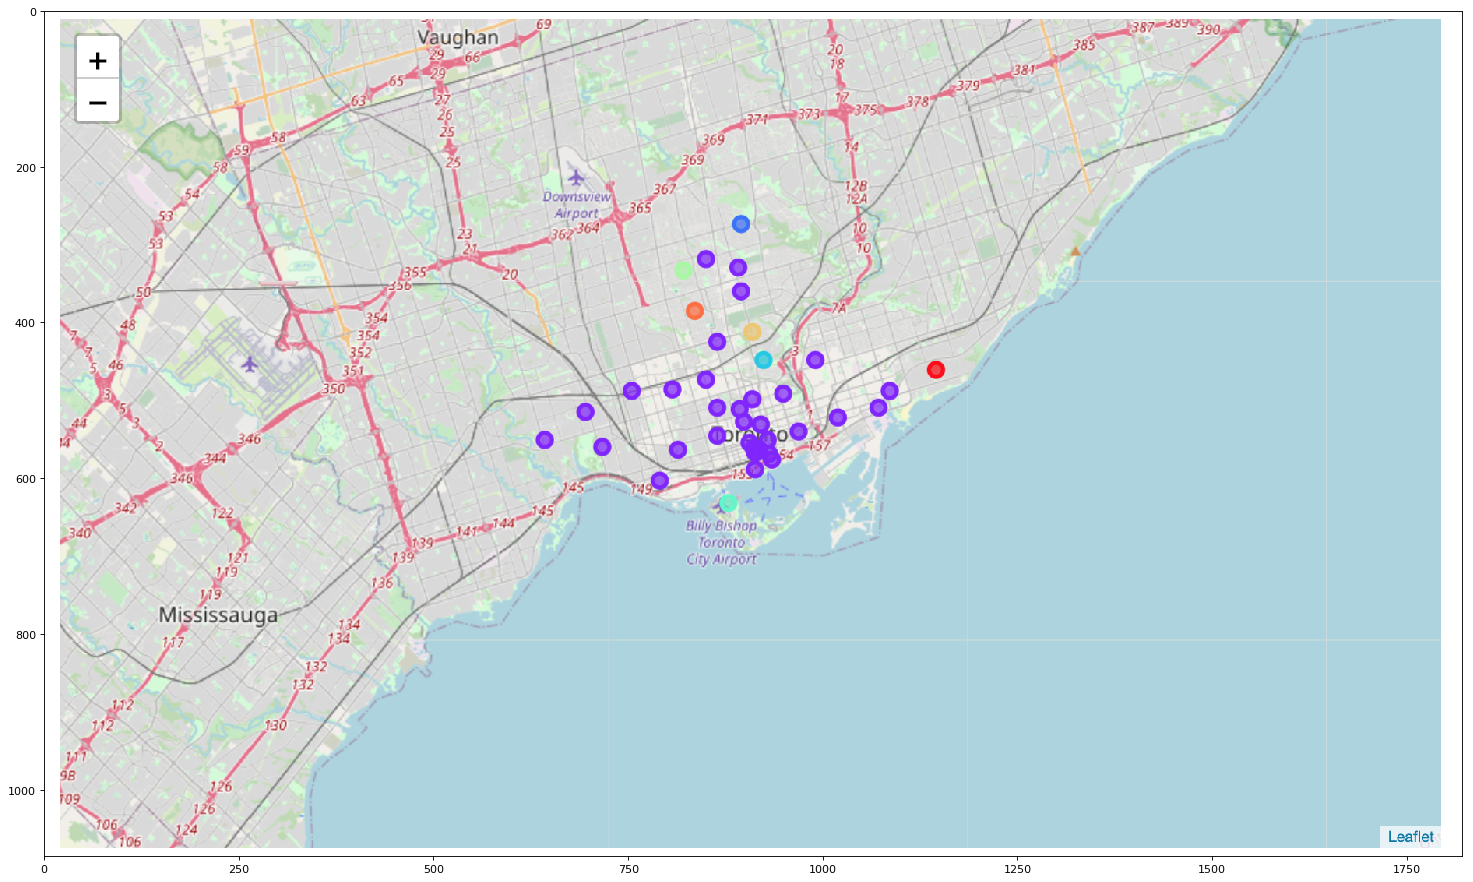

In [14]:

img=mpimg.imread('Segmenting & Clustering Toronto Neighborhood - img 3.png')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 14), dpi=80, sharex=True, sharey=True)
ax.imshow(img)

imgplot = plt.imshow(img)
plt.show()

## Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [137]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0  East Toronto               0      Asian Restaurant                   Pub   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0     Health Food Store                 Trail               Dog Run   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0          Dessert Shop                 Diner        Discount Store   

  9th Most Common Venue 10th Most Common Venue  
0   Distribution Center          Women's Store

#### Cluster 2

In [138]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
1       East Toronto               1      Greek Restaurant   
2       East Toronto               1        Sandwich Place   
3       East Toronto               1                  Café   
5    Central Toronto               1  Gym / Fitness Center   
6    Central Toronto               1        Clothing Store   
7    Central Toronto               1          Dessert Shop   
9    Central Toronto               1                   Pub   
11  Downtown Toronto               1           Coffee Shop   
12  Downtown Toronto               1           Coffee Shop   
13  Downtown Toronto               1           Coffee Shop   
14  Downtown Toronto               1        Clothing Store   
15  Downtown Toronto               1           Coffee Shop   
16  Downtown Toronto               1           Coffee Shop   
17  Downtown Toronto               1           Coffee Shop   
18  Downtown Toronto               1           Coffee Shop   
19  Downtown Toronto               1           Coffee Shop   
20  Downtown Toronto               1           Coffee Shop   
21  Downtown Toronto               1           Coffee Shop   
24   Central Toronto               1        Sandwich Place   
25  Downtown Toronto               1                  Café   
26  Downtown Toronto               1                  Café   
28  Downtown Toronto               1           Coffee Shop   
29  Downtown Toronto               1           Coffee Shop   
30  Downtown Toronto               1         Grocery Store   
31      West Toronto               1                Bakery   
32      West Toronto               1                   Bar   
33      West Toronto               1                  Café   
34      West Toronto               1                  Café   
35      West Toronto               1        Breakfast Spot   
36      West Toronto               1      Sushi Restaurant   
37  Downtown Toronto               1           Coffee Shop   
38      East Toronto               1  Gym / Fitness Center   

    2nd Most Common Venue      3rd Most Common Venue  \
1      Italian Restaurant                Coffee Shop   
2    Fast Food Restaurant                Pizza Place   
3             Coffee Shop        American Restaurant   
5                   Hotel               Dance Studio   
6             Coffee Shop                  Pet Store   
7          Sandwich Place                Pizza Place   
9             Coffee Shop        American Restaurant   
11            Pizza Place          Convenience Store   
12       Sushi Restaurant        Japanese Restaurant   
13                 Bakery                       Park   
14            Coffee Shop  Middle Eastern Restaurant   
15                   Café               Cocktail Bar   
16           Cocktail Bar                 Restaurant   
17         Sandwich Place         Italian Restaurant   
18                   Café                 Restaurant   
19               Aquarium                       Café   
20                   Café                      Hotel   
21             Restaurant                       Café   
24                   Café                Coffee Shop   
25                    Bar         Italian Restaurant   
26            Coffee Shop      Vietnamese Restaurant   
28     Seafood Restaurant                       Café   
29                   Café                        Gym   
30                   Café                       Park   
31               Pharmacy                Coffee Shop   
32             Restaurant      Vietnamese Restaurant   
33  Performing Arts Venue                Coffee Shop   
34     Mexican Restaurant            Thai Restaurant   
35              Gift Shop               Dessert Shop   
36                   Café                        Pub   
37       Sushi Restaurant        Fried Chicken Joint   
38                    Spa              Auto Workshop   

            4th Most Common Venue   5th Most Common Venue  \
1                      Restaurant  Furniture / Home Stor

#### Cluster 3

In [139]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
4  Central Toronto               2                  Park   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
4           Swim School              Bus Line         Women's Store   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
4          Dessert Shop           Event Space  Ethiopian Restaurant   

  8th Most Common Venue        9th Most Common Venue 10th Most Common Venue  
4     Electronics Store  Eastern European Restaurant             Donut Shop

#### Cluster 4

In [140]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
10  Downtown Toronto               3                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
10            Playground                 Trail         Deli / Bodega   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
10           Event Space  Ethiopian Restaurant     Electronics Store   

          8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
10  Eastern European Restaurant            Donut Shop       Doner Restaurant

#### Cluster 5

In [141]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
27  Downtown Toronto               4       Airport Service   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
27        Airport Lounge      Airport Terminal      Sculpture Garden   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
27               Airport    Airport Food Court          Airport Gate   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
27       Harbor / Marina              Boutique    Rental Car Location

#### Cluster 6

In [142]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
22  Central Toronto               5          Home Service   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
22                Garden        Ice Cream Shop         Women's Store   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
22      Department Store           Event Space  Ethiopian Restaurant   

   8th Most Common Venue        9th Most Common Venue 10th Most Common Venue  
22     Electronics Store  Eastern European Restaurant             Donut Shop

#### Cluster 7

In [143]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
8  Central Toronto               6                  Park   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
8            Restaurant           Summer Camp          Tennis Court   

  5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
8  Ethiopian Restaurant     Electronics Store  Eastern European Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
8            Donut Shop      Doner Restaurant                Dog Run

#### Cluster 8

In [146]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 7, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
23  Central Toronto               7                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
23         Jewelry Store                 Trail      Sushi Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
23              Bus Line      Department Store  Ethiopian Restaurant   

   8th Most Common Venue        9th Most Common Venue 10th Most Common Venue  
23     Electronics Store  Eastern European Restaurant             Donut Shop